# Plotter Class Usage Guide

The `Plotter` class provides utility methods for creating formatted figures with captions.

## Available Methods:
- `new(fig_size=None, constrained_layout=True, nrows=None, ncols=None)` - Create a new figure or subplots
- `subplots(nrows, ncols, fig_size=None, constrained_layout=True, **kwargs)` - Create figure with subplots
- `add_caption(title, fig_num=None, filename=None, use_panel_titles=True, auto_label_panels=True)` - Add formatted caption
- `add_panel_description(description)` - Manually add panel description
- `add_label(fig_label='A')` - Add label to current axes
- `label_subplots(labels=None, start='A')` - Manually label all subplots (auto-called by add_caption)
- `save_figure(filename='figure')` - Save to figures/ directory
- `plot_sequence(fiber, ...)` - Plot ChromatinFiber objects
- `panels` - Property to access subplot axes

## Basic Workflow for Multi-panel Figures:
1. Create Plotter instance: `plot = Plotter()`
2. Create subplots: `plot.new(nrows=2, ncols=2)`
3. Create plots and set titles: `panel.set_title("Description")`
4. Add caption: `plot.add_caption("Main title.")` - automatically does everything!
5. Display: `plt.show()`

## What `add_caption()` Does Automatically:
When called on a multi-panel figure, `add_caption()` will:
1. **Label all panels** (A, B, C, D...) if there's more than one subplot
2. **Extract titles** from all panels using `ax.get_title()`
3. **Remove titles** from the plots for a cleaner look
4. **Add to caption** with labels: "**A)** description **B)** description"

No need to manually call `label_subplots()` anymore!

In [ ]:
import sys
from pathlib import Path

# Add nuctool directory to path for imports
nuctool_path = Path.cwd().parent / 'nuctool'
if str(nuctool_path) not in sys.path:
    sys.path.insert(0, str(nuctool_path))

import numpy as np
from Plotter import Plotter
import matplotlib.pyplot as plt

plot = Plotter()

## Example 1: Multi-panel Figure with Auto-labeling

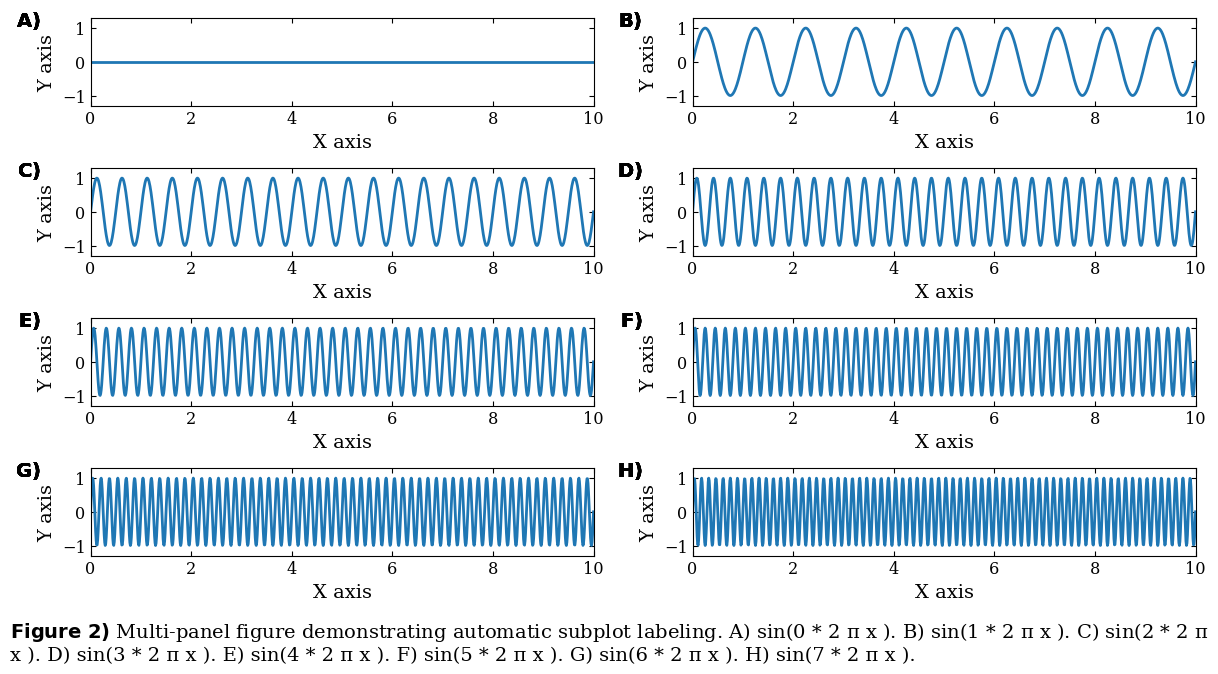

In [12]:
# Create figure with subplots
plot.new(fig_num = 2, fig_size=(12, 6), ncols = 2, nrows=4)

# Plot each panel and set its title (will be moved to caption)
for i, panel in enumerate(plot.panels):
    x = np.linspace(0, 10, 1000)
    y = np.sin(i *x * (2*np.pi))
    panel.plot(x, y, linewidth=2)
    panel.set_xlim(0, 10)
    panel.set_ylim(-1.3, 1.3)
    panel.set_xlabel('X axis')
    panel.set_ylabel('Y axis')
    panel.set_title(f"sin({i} * 2 π x )")

# Add caption - automatically labels panels, extracts titles, and moves them to caption
plot.caption("Multi-panel figure demonstrating automatic subplot labeling.")
plt.show()

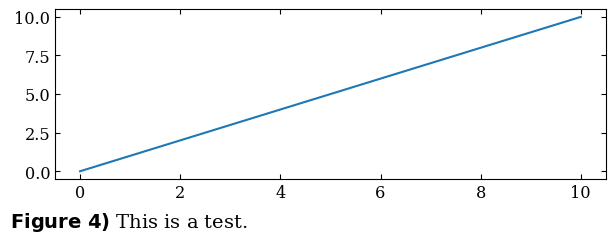

In [4]:
plot.new(fig_size=(6,2))
plt.plot(x,x)
plot.caption("This is a test.")